In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display, Markdown

# EDA - Exploratory Data Analysis

In [2]:
# Loading dataset #Using a raw string (r-string):
df = pd.read_csv(r"C:\Users\tayfash\Desktop\Oluwajuwonlo\Shu\Dissertation\Datasets\Dataset\Dataset 1Customer Demographic\telecom_churn.csv")



In [3]:
#title = "First Few Rows of the Dataset"
#display(Markdown(f"**{title.center(120)}**"))
#display(df.head())

#Display first few rows
width = 120
title = "First Few Rows of the Dataset"
print(title.center(width))
display(df.head())

#print(f"---- First Few Rows of the Dataset ----")
#display(df.head())

                                             First Few Rows of the Dataset                                              


,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [4]:
# Display last few rows
width = 120
title= "Last Few Rows of the Dataset "
print(title.center(width))
display(df.tail())

                                             Last Few Rows of the Dataset                                               


,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0
243552,243553,BSNL,F,37,Telangana,Hyderabad,139086,2023-05-04,0,144297,61,7,3384,0


In [5]:
# Display dataset information
width = 40
title="Information about the Dataset"
print(title.center(width))
print(df.info())

     Information about the Dataset      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memo

In [6]:
# Check the shape of the dataset
print(df.shape)

(243553, 14)


In [7]:
# Check for missing values
print(df.isnull().sum())


customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64


In [8]:
# Check for duplicates
print("Check for duplicate ")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

Check for duplicate 
Number of duplicate rows: 0


In [9]:
# Check data type of 'date_of_registration' before conversion
print(df['date_of_registration'].dtypes)

object


In [10]:
# Gender Distribution
print(" Value count for Gender variable ")
print(df['gender'].value_counts())

 Value count for Gender variable 
M    145977
F     97576
Name: gender, dtype: int64


# Data Distribution and making decisions on data preprocessing

In [11]:
#State Distribution
print("Value count for State variable ")
print(df['state'].value_counts())

Value count for State variable 
Uttarakhand          8856
Karnataka            8845
Maharashtra          8820
Madhya Pradesh       8817
Arunachal Pradesh    8757
Jharkhand            8755
Rajasthan            8750
Uttar Pradesh        8742
Haryana              8740
Kerala               8725
Tamil Nadu           8718
Odisha               8712
Goa                  8694
Telangana            8689
Sikkim               8689
Mizoram              8689
Meghalaya            8684
Himachal Pradesh     8682
Chhattisgarh         8677
Tripura              8660
Manipur              8651
Andhra Pradesh       8649
Bihar                8633
Punjab               8628
Gujarat              8610
West Bengal          8572
Nagaland             8562
Assam                8547
Name: state, dtype: int64


In [12]:
#City Distribution
print("Value count for City variable ")
print(df['city'].value_counts())


Value count for City variable 
Chennai      40749
Hyderabad    40698
Kolkata      40661
Bangalore    40603
Delhi        40456
Mumbai       40386
Name: city, dtype: int64


In [13]:
#Telecom Partner Distribution
print("Value count for Telecom_partner variable ")
print(df['telecom_partner'].value_counts())


Value count for Telecom_partner variable 
Reliance Jio    61123
Airtel          60905
Vodafone        60802
BSNL            60723
Name: telecom_partner, dtype: int64


In [14]:
#Telecom Counts
telecom_counts = df['telecom_partner'].value_counts()

# Convert the Series to DataFrame for a table-like display
telecom_df = telecom_counts.reset_index()
telecom_df.columns = ['Telecom Partner', 'Number of Customers']

# Display the table
display(telecom_df)

,Telecom Partner,Number of Customers
0,Reliance Jio,61123
1,Airtel,60905
2,Vodafone,60802
3,BSNL,60723


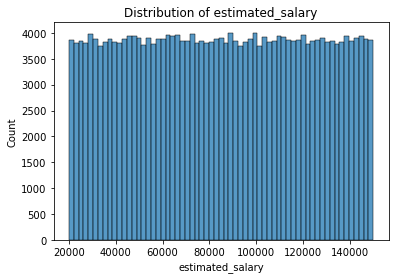

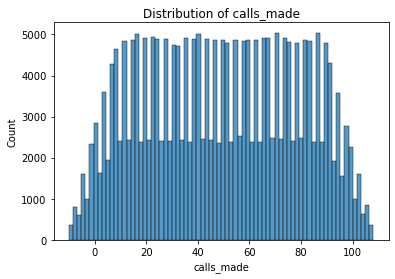

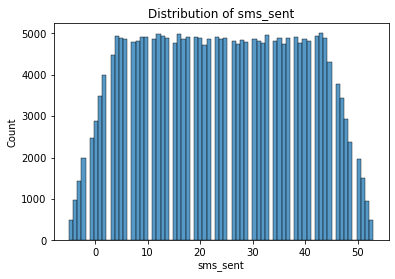

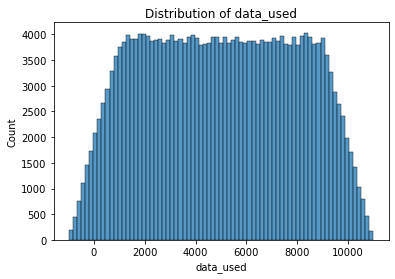

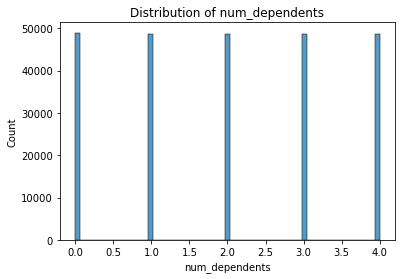

In [15]:
# Visualizing distributions of numerical columns
numerical_features = ['estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'num_dependents']
for feature in numerical_features:
    sns.histplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()


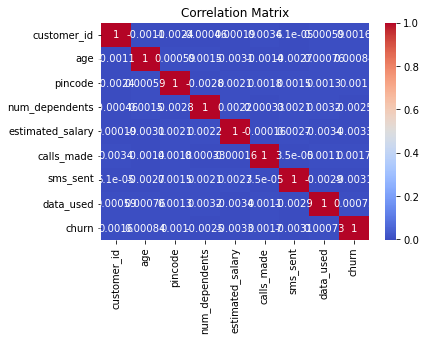

In [16]:
# Checking relationships between variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

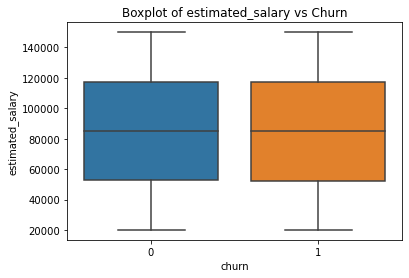

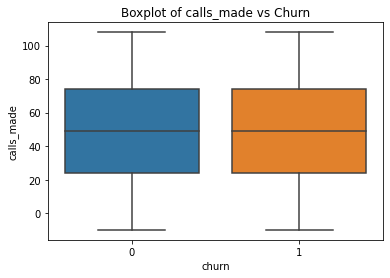

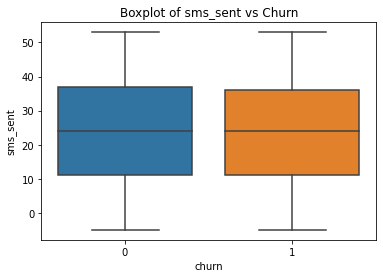

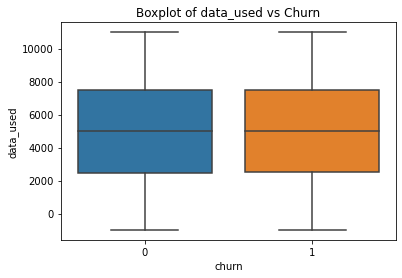

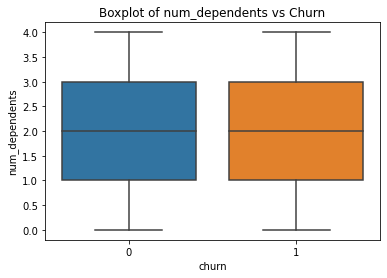

In [17]:
# Boxplots for numerical variables against churn
for feature in numerical_features:
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs Churn')
    plt.show()

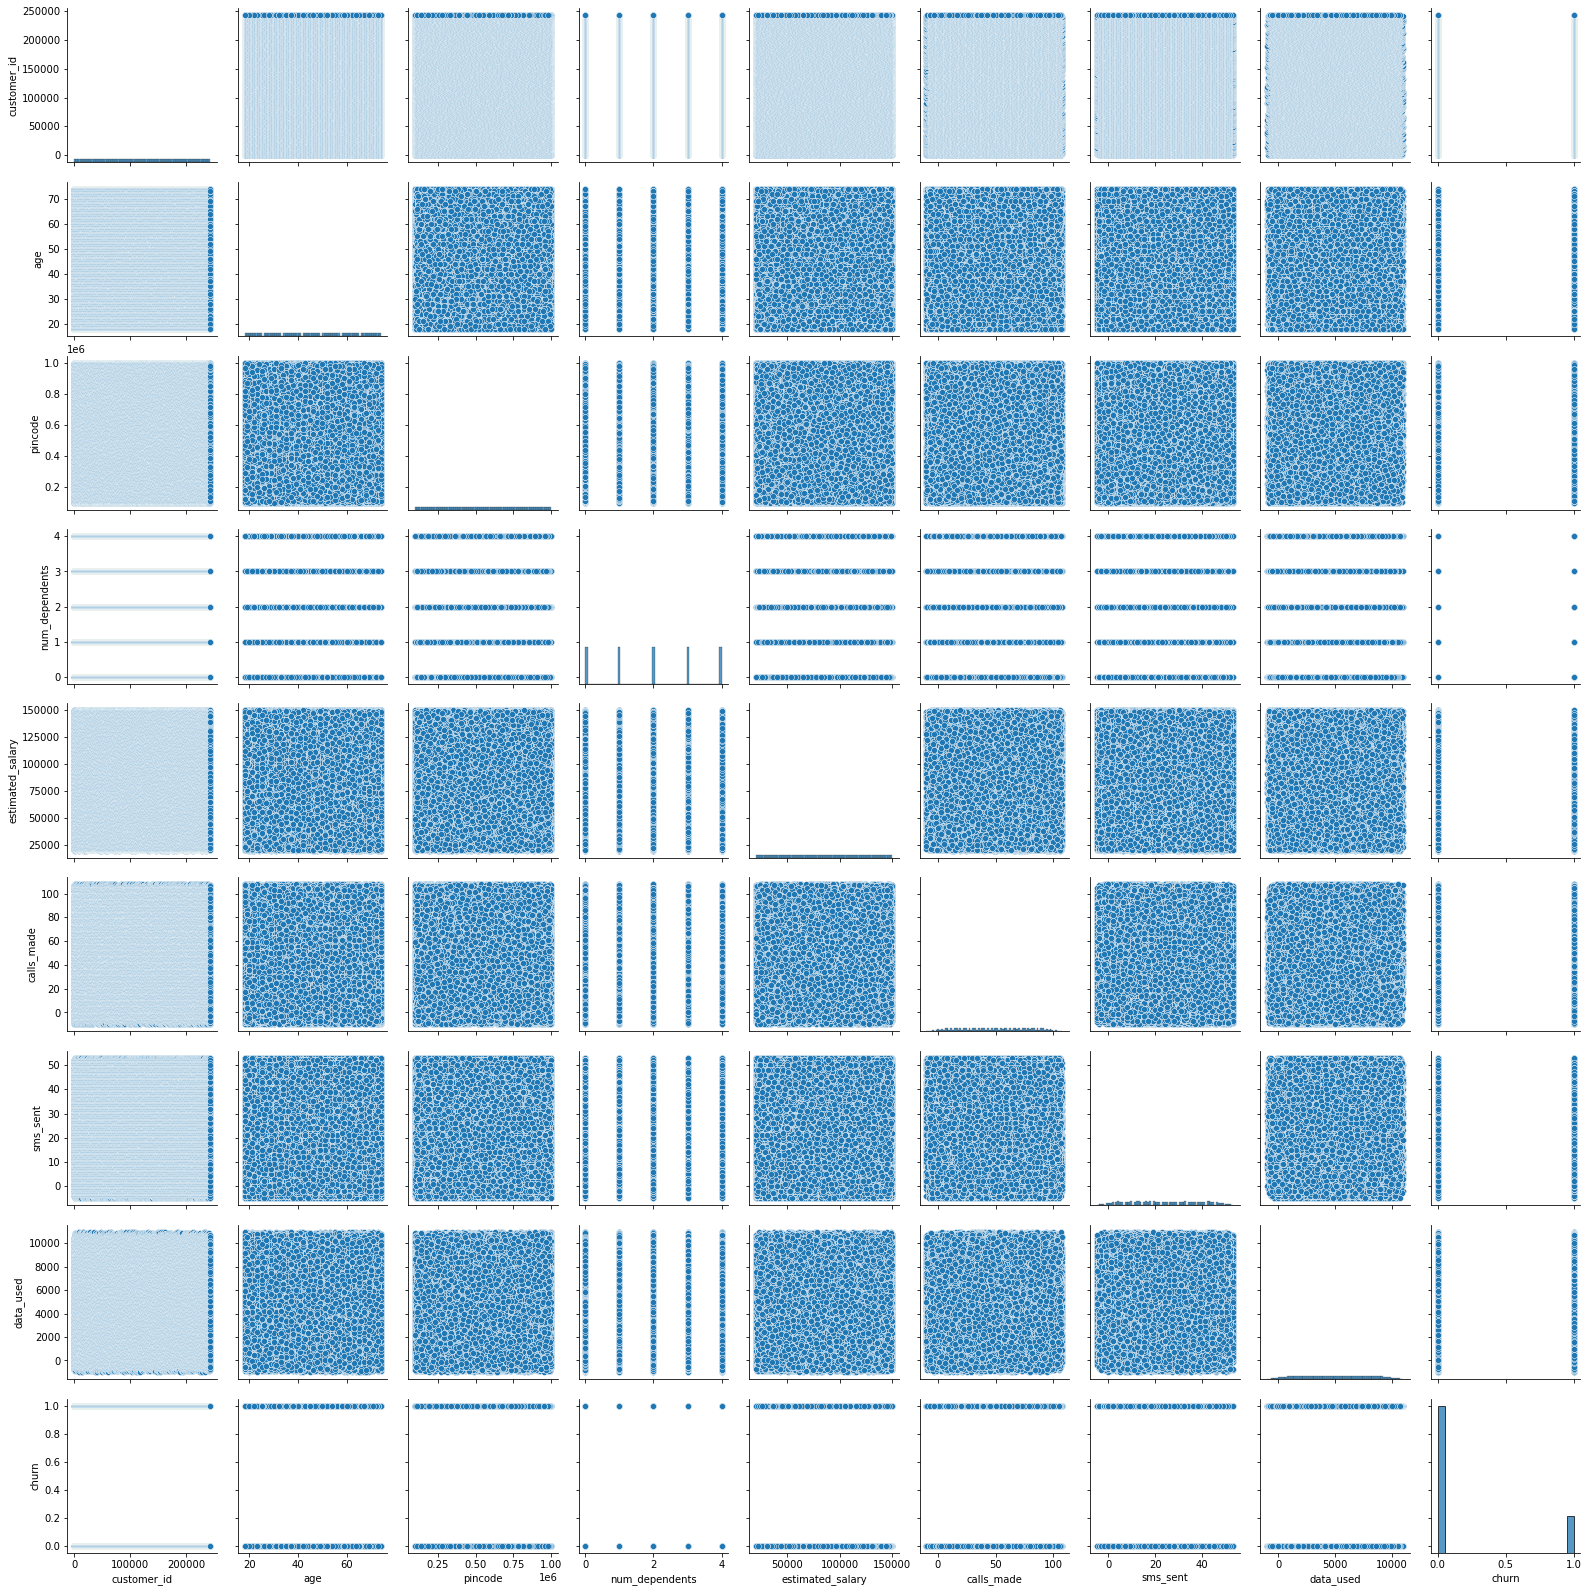

In [18]:
# Pair plots
sns.pairplot(df)
plt.show()

# Data Cleaning


In [19]:
# Convert 'date_of_registration' from object to datetime format
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'])


In [20]:
# Check data type of 'date_of_registration' after conversion
print(df['date_of_registration'].dtypes)

datetime64[ns]


In [21]:
# Created a flag column for negative values before correcting them
for column in ['calls_made', 'sms_sent', 'data_used']:
    df[f'{column}_negative_flag'] = df[column].apply(lambda x: 1 if x < 0 else 0)

# Replacing Negative Values with Median

In [22]:
for column in ['calls_made', 'sms_sent', 'data_used']:
    # Calculate the median for positive values only
    median_value = df[df[column] >= 0][column].median()
    
    # Print the median value
    print(f"Median value for {column}: {median_value}")

# Correct the negative values using median of positive values
#for column in ['calls_made', 'sms_sent', 'data_used']:
    #median_val = df.loc[df[column] >= 0, column].median()
    #df.loc[df[column] < 0, column] = median_val

Median value for calls_made: 50.0
Median value for sms_sent: 25.0
Median value for data_used: 5112.0


In [23]:
# Count the number of negative values before replacement
negative_count_before = (df[column] < 0).sum()

In [24]:
# Replace negative values with the median
df.loc[df[column] < 0, column] = median_value

In [25]:
# Count the number of negative values after replacement
negative_count_after = (df[column] < 0).sum()

In [26]:
 # Print the count of negative values before and after the replacement
print(f"Number of negative values in {column} before replacement: {negative_count_before}")
print(f"Number of negative values in {column} after replacement: {negative_count_after}\n")

Number of negative values in data_used before replacement: 6050
Number of negative values in data_used after replacement: 0



# Feature Engineering

In [27]:
# Day of the Week:
df['registration_dayofweek'] = df['date_of_registration'].dt.dayofweek

# Date extraction
#df['registration_year'] = df['date_of_registration'].dt.year
#df['registration_month'] = df['date_of_registration'].dt.month
#df['registration_day'] = df['date_of_registration'].dt.day


In [28]:
# Quarter
df['registration_quarter'] = df['date_of_registration'].dt.quarter

In [29]:
# Is Weekend
df['is_weekend'] = df['date_of_registration'].dt.weekday >= 5

In [30]:
#Year of registration
df['registration_year'] = df['date_of_registration'].dt.year

In [31]:
# Month of registration
df['registration_month'] = df['date_of_registration'].dt.month


In [32]:
# Day of registration
df['registration_day'] = df['date_of_registration'].dt.day

In [33]:
display(df[['date_of_registration', 
            'registration_year', 
            'registration_month', 
            'registration_day', 
            'registration_dayofweek', 
            'registration_quarter', 
            'is_weekend']].head())


,date_of_registration,registration_year,registration_month,registration_day,registration_dayofweek,registration_quarter,is_weekend
0,2020-01-01,2020,1,1,2,1,False
1,2020-01-01,2020,1,1,2,1,False
2,2020-01-01,2020,1,1,2,1,False
3,2020-01-01,2020,1,1,2,1,False
4,2020-01-01,2020,1,1,2,1,False


In [34]:
display(df[['date_of_registration', 
            'registration_year', 
            'registration_month', 
            'registration_day', 
            'registration_dayofweek', 
            'registration_quarter', 
            'is_weekend']].tail())


,date_of_registration,registration_year,registration_month,registration_day,registration_dayofweek,registration_quarter,is_weekend
243548,2023-05-03,2023,5,3,2,2,False
243549,2023-05-03,2023,5,3,2,2,False
243550,2023-05-03,2023,5,3,2,2,False
243551,2023-05-03,2023,5,3,2,2,False
243552,2023-05-04,2023,5,4,3,2,False


# Create other features

In [35]:
# Total Interactions Calculation
#It gives an aggregate measure of how active a customer is.
df['total_interactions'] = df['calls_made'] + df['sms_sent'] + df['data_used']


In [36]:
#Tenure Days Calculation
#This provides an idea of how long a customer has been with the service
#This ensures that the tenure is calculated based on the timeframe of your dataset
last_date_in_dataset = df['date_of_registration'].max() # df['date_of_registration'].max() the maximum date in the dataset
df['tenure_days'] = (last_date_in_dataset - df['date_of_registration']).dt.days

#Tenure Days Calculation
#This provides an idea of how long a customer has been with the service
#current_date = pd.to_datetime('today')
#df['tenure_days'] = (current_date - df['date_of_registration']).dt.days

In [37]:
#Average Communication per Day Calculation
#It determines the average interaction per day for each customer.
df['average_communication'] = df['total_interactions'] / df['tenure_days']


In [38]:
# Calls per Dependent Calculation
# It measures how many calls, on average, a customer makes for each of their dependents
df['calls_per_dependent'] = np.where(df['num_dependents'] != 0, #Handling Division by zero
                                    df['calls_made'] / df['num_dependents'], 
                                    df['calls_made'])

#Calls per Dependent Calculation
#It measures how many calls, on average, a customer makes for each of their dependents
#df['calls_per_dependent'] = df['calls_made'] / df['num_dependents']


In [39]:
# Cost per Dependent
df['cost_per_dependent'] = np.where(df['num_dependents'] != 0, # Handling Division by zero
                                    df['total_interactions'] / df['num_dependents'], 
                                    df['total_interactions'])


In [40]:
#Data Usage per Dependent
df['data_per_dependent'] = np.where(df['num_dependents'] != 0, # Handling Division by zero
                                    df['data_used'] / df['num_dependents'], 
                                    df['data_used'])


In [41]:
#SMS per Dependent
df['sms_per_dependent'] = np.where(df['num_dependents'] != 0, # Handling Division by zero
                                   df['sms_sent'] / df['num_dependents'], 
                                   df['sms_sent'])


In [42]:
# Dependent Interaction Ratio
df['interaction_per_dependent'] = np.where(df['num_dependents'] != 0, 
                                           df['total_interactions'] / df['num_dependents'], 
                                           df['total_interactions'])


In [43]:
#Is Family? A binary flag indicating if a customer likely has a family (based on number of dependents).
df['is_family'] = df['num_dependents'] > 0

In [44]:
# Interaction-to-Salary Ratio Calculation
#It gives insights into spending or activity habits based on income
df['interaction_to_salary'] = df['total_interactions'] / df['estimated_salary']

In [45]:
#Checking for Infinite Values through the columns and returns the corresponding column(s) that is/are guilty as charged
inf_columns = [col for col in df.columns if df[col].dtype.kind in 'ifc' and np.isinf(df[col]).any()]
print(inf_columns)


['average_communication']


In [46]:
# Fixing divison by zero in 'average_communication'
df['average_communication'] = np.where(df['tenure_days'] != 0,
                                       df['total_interactions'] / df['tenure_days'],
                                       0)


In [47]:
# Rechecking for Infinite Values through the columns and returns the corresponding column(s) that is/are guilty as charged
inf_columns = [col for col in df.columns if df[col].dtype.kind in 'ifc' and np.isinf(df[col]).any()]
print(inf_columns)


[]


In [48]:
columns_to_display = [
    'total_interactions', 'tenure_days', 'average_communication', 'calls_per_dependent', 
    'interaction_to_salary', 'cost_per_dependent', 'data_per_dependent', 
    'sms_per_dependent', 'interaction_per_dependent', 'is_family'
]
display(df[columns_to_display].head())


,total_interactions,tenure_days,average_communication,calls_per_dependent,interaction_to_salary,cost_per_dependent,data_per_dependent,sms_per_dependent,interaction_per_dependent,is_family
0,5201,1219,4.266612,11.0,0.041621,1300.25,1278.0,11.25,1300.25,True
1,6074,1219,4.982773,31.0,0.046524,3037.00,2986.5,19.50,3037.00,True
2,266,1219,0.218212,49.0,0.001787,266.00,193.0,24.00,266.00,False
3,9482,1219,7.778507,80.0,0.244874,9482.00,9377.0,25.00,9482.00,True
4,1486,1219,1.219032,39.0,0.026970,743.00,696.5,7.50,743.00,True


In [49]:
columns_to_display = [
    'total_interactions', 'tenure_days', 'average_communication', 'calls_per_dependent', 
    'interaction_to_salary', 'cost_per_dependent', 'data_per_dependent', 
    'sms_per_dependent', 'interaction_per_dependent', 'is_family'
]
display(df[columns_to_display].tail())


,total_interactions,tenure_days,average_communication,calls_per_dependent,interaction_to_salary,cost_per_dependent,data_per_dependent,sms_per_dependent,interaction_per_dependent,is_family
243548,4139,1,4139.0,9.333333,0.031697,1379.666667,1367.333333,3.0,1379.666667,True
243549,7646,1,7646.0,80.000000,0.092799,7646.000000,7521.000000,45.0,7646.000000,False
243550,6577,1,6577.0,6.500000,0.128212,1644.250000,1636.750000,1.0,1644.250000,True
243551,1220,1,1220.0,40.000000,0.014527,610.000000,562.500000,7.5,610.000000,True
243552,3452,0,0.0,61.000000,0.023923,3452.000000,3384.000000,7.0,3452.000000,False


#  Visualization Of New The Features

#It helps to gain insights into the shape, spread, and central tendencies of the data for each feature.


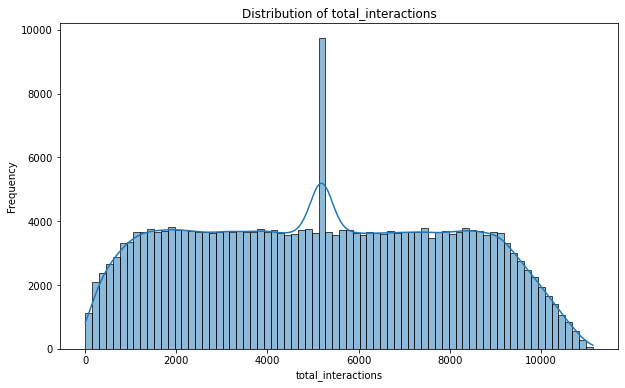

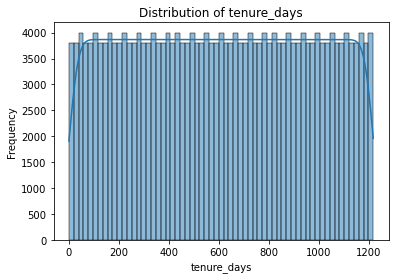

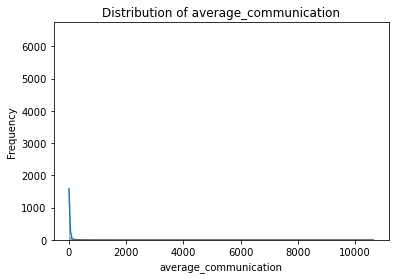

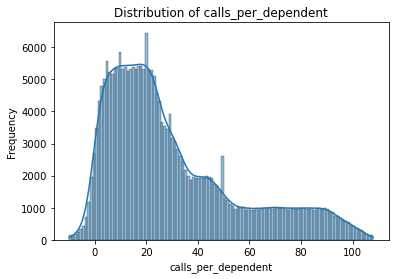

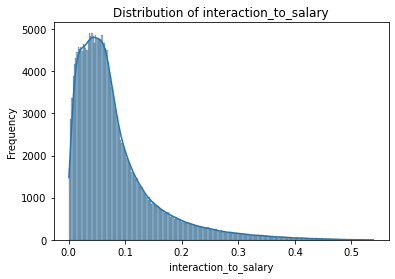

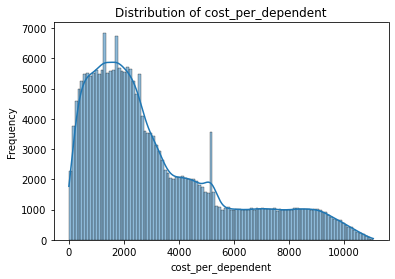

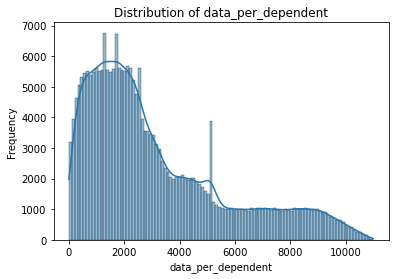

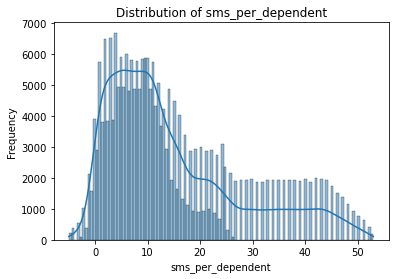

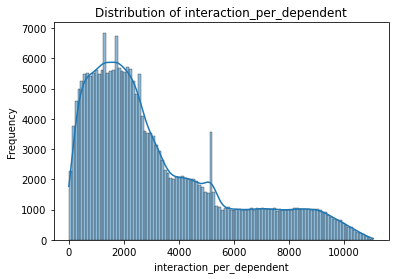

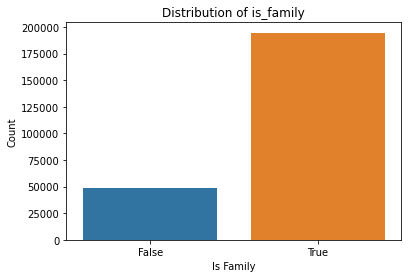

In [50]:
# Smoothed representation of the data distribution, helping to identify patterns more clearly 

# Setting a larger figure size for clarity
plt.figure(figsize=(10,6))

features = ['total_interactions', 'tenure_days', 'average_communication', 'calls_per_dependent', 
            'interaction_to_salary', 'cost_per_dependent', 'data_per_dependent', 'sms_per_dependent', 
            'interaction_per_dependent']

for feature in features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# For the 'is_family' boolean feature
sns.countplot(x='is_family', data=df)
plt.title('Distribution of is_family')
plt.xlabel('Is Family')
plt.ylabel('Count')
plt.show()


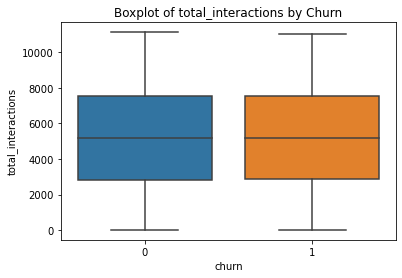

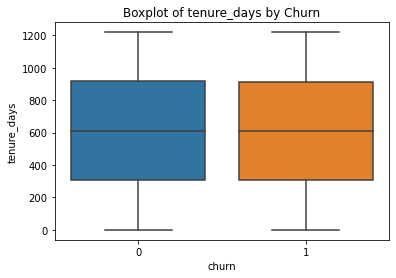

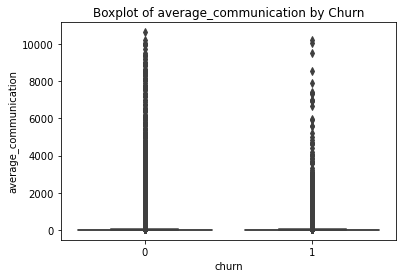

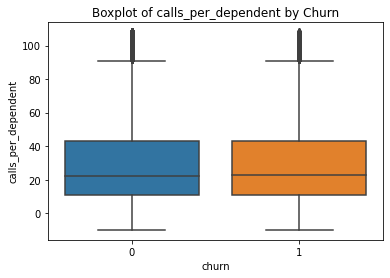

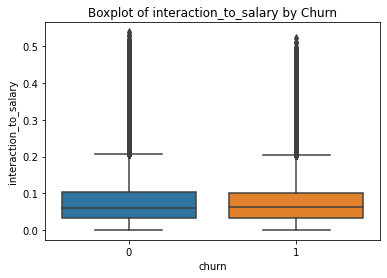

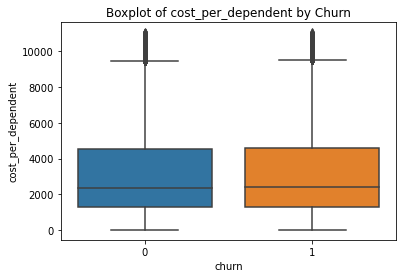

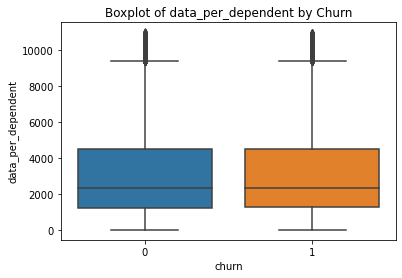

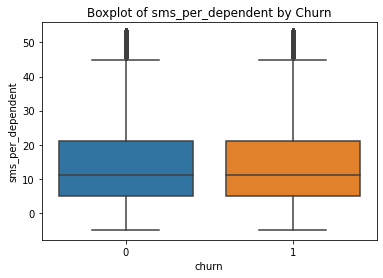

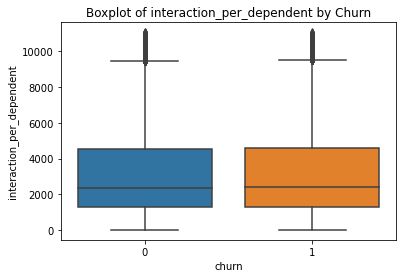

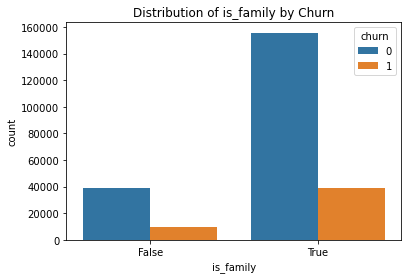

In [51]:
# Helps to visualize these features relative to churn
features = ['total_interactions', 'tenure_days', 'average_communication', 'calls_per_dependent', 
            'interaction_to_salary', 'cost_per_dependent', 'data_per_dependent', 'sms_per_dependent', 
            'interaction_per_dependent']

for feature in features:
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Churn')
    plt.show()

# For the 'is_family' boolean feature
sns.countplot(x='is_family', hue='churn', data=df)
plt.title('Distribution of is_family by Churn')
plt.show()



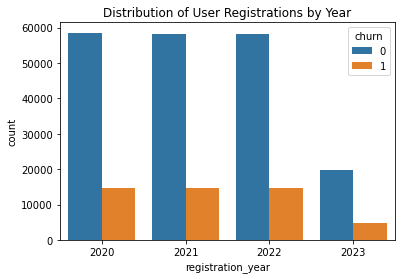

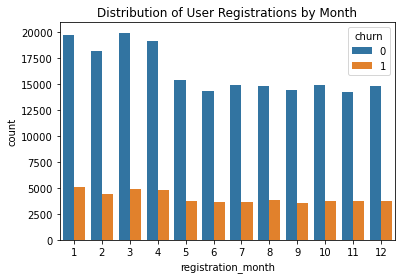

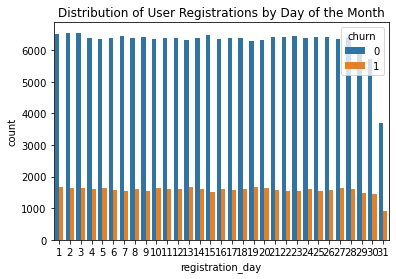

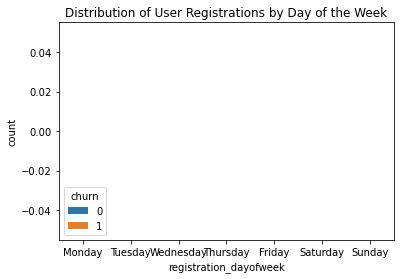

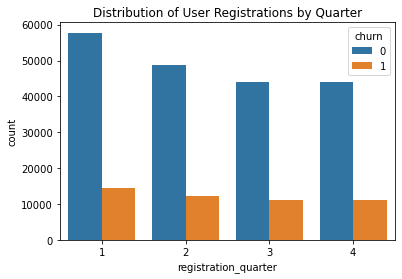

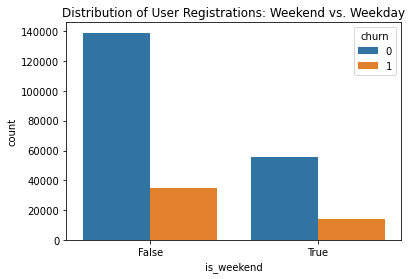

In [52]:
# 'registration_year'
# show the distribution of users by registration year.

sns.countplot(x='registration_year', hue='churn', data=df)
plt.title('Distribution of User Registrations by Year')
plt.show()

# 'registration_month'
# A count plot to show distribution by month
sns.countplot(x='registration_month', hue='churn', data=df)
plt.title('Distribution of User Registrations by Month')
plt.show()

# 'registration_day'
#A count plot to see if any day of the month stands out for registrations.
sns.countplot(x='registration_day', hue='churn', data=df)
plt.title('Distribution of User Registrations by Day of the Month')
plt.show()

# 'registration_dayofweek'
# show which days of the week have the most registrations
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='registration_dayofweek', hue='churn', data=df, order=order_days)
plt.title('Distribution of User Registrations by Day of the Week')
plt.show()

# 'registration_quarter
# show registrations by quarter
sns.countplot(x='registration_quarter', hue='churn', data=df)
plt.title('Distribution of User Registrations by Quarter')
plt.show()

# 'is_weekend
# show the distribution of registrations during the weekend versus weekdays.
sns.countplot(x='is_weekend', hue='churn', data=df)
plt.title('Distribution of User Registrations: Weekend vs. Weekday')
plt.show()


# Dropping Unnecessary Columns

In [53]:
# View all the columns of the dataframe
display(df.columns)

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn',
       'calls_made_negative_flag', 'sms_sent_negative_flag',
       'data_used_negative_flag', 'registration_dayofweek',
       'registration_quarter', 'is_weekend', 'registration_year',
       'registration_month', 'registration_day', 'total_interactions',
       'tenure_days', 'average_communication', 'calls_per_dependent',
       'cost_per_dependent', 'data_per_dependent', 'sms_per_dependent',
       'interaction_per_dependent', 'is_family', 'interaction_to_salary'],
      dtype='object')

In [54]:
# Dropping the 'date_of_registration' column, safely dropping it before examining correlation.
# date_of_registration column not longer needed already extracted relevant features from it.
df.drop(['date_of_registration'], axis=1, inplace=True)

In [55]:
# Dropping the 'customer_id' column, safely setting it aside as it won't provide any meaningful correlation or VIF.
df.drop('customer_id', axis=1, inplace=True)

In [56]:
# Drop some other columns
columns_to_drop = ['calls_made_negative_flag', 'sms_sent_negative_flag', 'data_used_negative_flag', 'pincode']
df = df.drop(columns=columns_to_drop)

In [57]:
# View all the columns of the dataframe
display(df.columns)

Index(['telecom_partner', 'gender', 'age', 'state', 'city', 'num_dependents',
       'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'churn',
       'registration_dayofweek', 'registration_quarter', 'is_weekend',
       'registration_year', 'registration_month', 'registration_day',
       'total_interactions', 'tenure_days', 'average_communication',
       'calls_per_dependent', 'cost_per_dependent', 'data_per_dependent',
       'sms_per_dependent', 'interaction_per_dependent', 'is_family',
       'interaction_to_salary'],
      dtype='object')

In [58]:
# Show all non numericals columns
non_numerical_cols = df.select_dtypes(exclude=[np.number])

# Display the columns
print(non_numerical_cols.columns)

Index(['telecom_partner', 'gender', 'state', 'city', 'is_weekend',
       'is_family'],
      dtype='object')


# Examining correlations and Computing VIF

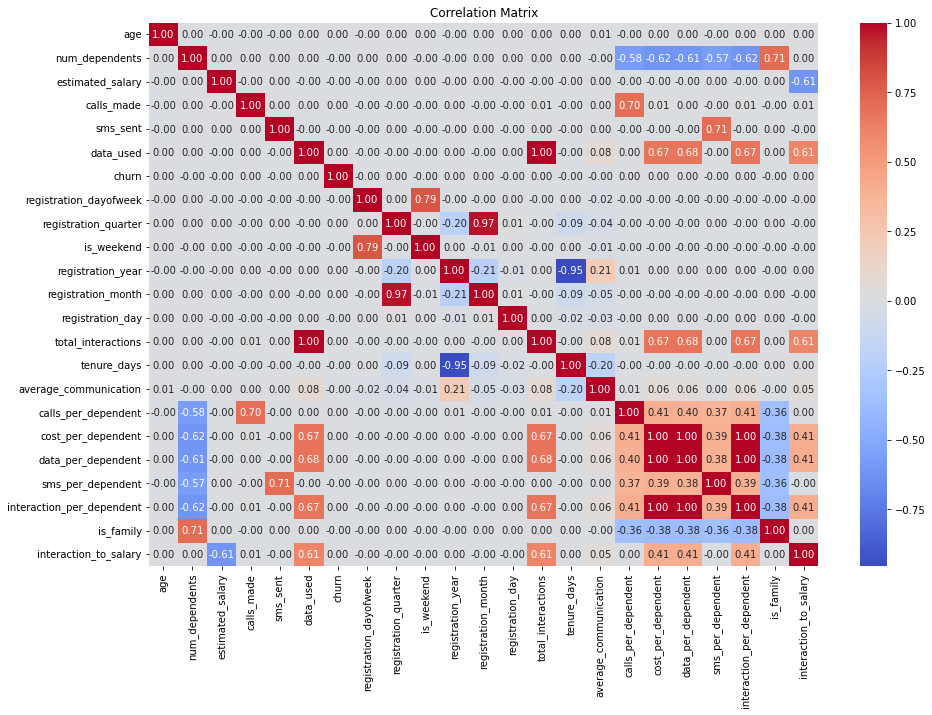

In [59]:
# Examining correlations
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [60]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                age  num_dependents  estimated_salary  \
age                        1.000000        0.001462         -0.003103   
num_dependents             0.001462        1.000000          0.002157   
estimated_salary          -0.003103        0.002157          1.000000   
calls_made                -0.001399        0.000325         -0.000156   
sms_sent                  -0.002749        0.002126          0.002720   
data_used                  0.001222        0.001983         -0.002899   
churn                      0.000839       -0.002543         -0.003332   
registration_dayofweek    -0.000165        0.000438         -0.000907   
registration_quarter       0.001226        0.001147          0.000946   
is_weekend                 0.001902       -0.000162          0.000219   
registration_year         -0.001573       -0.000830         -0.000165   
registration_month         0.001533        0.001210          0.001198   
registration_day           0.001384        0.000554

In [61]:
# Display correlations with respect to 'churn' column, sorted
print(correlation_matrix['churn'].sort_values(ascending=False))

churn                        1.000000
calls_per_dependent          0.003853
interaction_per_dependent    0.002737
cost_per_dependent           0.002737
data_per_dependent           0.002718
registration_quarter         0.002390
registration_month           0.001783
calls_made                   0.001692
total_interactions           0.001560
data_used                    0.001559
interaction_to_salary        0.001245
registration_year            0.001114
age                          0.000839
sms_per_dependent           -0.000770
registration_day            -0.001199
average_communication       -0.001265
tenure_days                 -0.001651
is_weekend                  -0.002085
is_family                   -0.002335
num_dependents              -0.002543
registration_dayofweek      -0.002935
sms_sent                    -0.003072
estimated_salary            -0.003332
Name: churn, dtype: float64


# Data Splitting

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Re-running Checks and handling infinity values and zeros after splitting


In [64]:
X_train[['calls_made', 'sms_sent', 'data_used']].describe()


,calls_made,sms_sent,data_used
count,170487.000000,170487.000000,170487.000000
mean,49.010030,23.968132,5127.845425
std,29.449587,14.740817,2817.369248
min,-10.000000,-5.000000,0.000000
25%,24.000000,11.000000,2732.000000
50%,49.000000,24.000000,5112.000000
75%,74.000000,37.000000,7498.000000
max,108.000000,53.000000,10991.000000


In [65]:
# Cross-reference with other columns
filter_condition = X_train['num_dependents'] > 0
X_train[filter_condition][['calls_per_dependent', 'data_per_dependent', 'sms_per_dependent']].describe()


,calls_per_dependent,data_per_dependent,sms_per_dependent
count,136320.000000,136320.000000,136320.000000
mean,25.528747,2674.852203,12.462348
std,22.630438,2251.332437,11.192914
min,-10.000000,0.000000,-5.000000
25%,9.666667,1095.729167,4.666667
50%,19.666667,2049.000000,9.500000
75%,33.333333,3453.500000,16.333333
max,108.000000,10991.000000,53.000000


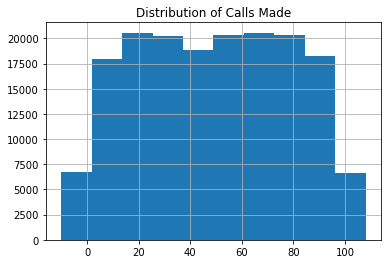

In [66]:
# This can help in spotting any unusual patterns
X_train['calls_made'].hist()
plt.title('Distribution of Calls Made')
plt.show()


In [67]:

for column in ['calls_made', 'sms_sent', 'calls_per_dependent', 'sms_per_dependent']:
    negative_count = X_train[X_train[column] < 0].shape[0]
    print(f"Number of negative values in {column}: {negative_count}")

Number of negative values in calls_made: 4733
Number of negative values in sms_sent: 5196
Number of negative values in calls_per_dependent: 4733
Number of negative values in sms_per_dependent: 5196


In [68]:
# Check for negative values
columns_to_check = ['age', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'total_interactions', 'tenure_days', 'average_communication', 'calls_per_dependent', 'cost_per_dependent', 'data_per_dependent', 'sms_per_dependent', 'interaction_per_dependent', 'interaction_to_salary']

# Investigate negative values
for column in columns_to_check:
    negative_count = X_train[X_train[column] < 0].shape[0]
    print(f"Number of negative values in {column}: {negative_count}")


Number of negative values in age: 0
Number of negative values in num_dependents: 0
Number of negative values in estimated_salary: 0
Number of negative values in calls_made: 4733
Number of negative values in sms_sent: 5196
Number of negative values in data_used: 0
Number of negative values in total_interactions: 0
Number of negative values in tenure_days: 0
Number of negative values in average_communication: 0
Number of negative values in calls_per_dependent: 4733
Number of negative values in cost_per_dependent: 0
Number of negative values in data_per_dependent: 0
Number of negative values in sms_per_dependent: 5196
Number of negative values in interaction_per_dependent: 0
Number of negative values in interaction_to_salary: 0


In [69]:
# Investigate zero values
for column in columns_to_check:
    zero_count = (X_train[column] == 0).sum()
    print(f"Number of zero values in {column}: {zero_count}")


Number of zero values in age: 0
Number of zero values in num_dependents: 34167
Number of zero values in estimated_salary: 0
Number of zero values in calls_made: 957
Number of zero values in sms_sent: 2001
Number of zero values in data_used: 10
Number of zero values in total_interactions: 0
Number of zero values in tenure_days: 0
Number of zero values in average_communication: 0
Number of zero values in calls_per_dependent: 957
Number of zero values in cost_per_dependent: 0
Number of zero values in data_per_dependent: 10
Number of zero values in sms_per_dependent: 2001
Number of zero values in interaction_per_dependent: 0
Number of zero values in interaction_to_salary: 0


In [70]:
# Addressing the negative values,this approach ensures that the negative values are replaced with a central tendency measure 
# Calculate the median value for each specified column in X_train using only positive values.
# Using the median value to replace negative values in both X_train and X_test.
for column in columns_to_check:
    median_value = X_train[X_train[column] >= 0][column].median()
    
    # Replace negative values in X_train
    X_train.loc[X_train[column] < 0, column] = median_value
    
    # Replace negative values in X_test
    X_test.loc[X_test[column] < 0, column] = median_value


In [71]:
# Verifying the Implementation

for column in columns_to_check:
    # Count negative values in X_train
    negative_count_train = (X_train[column] < 0).sum()
    
    # Count negative values in X_test
    negative_count_test = (X_test[column] < 0).sum()

    print(f"Number of negative values in {column} in X_train: {negative_count_train}")
    print(f"Number of negative values in {column} in X_test: {negative_count_test}\n")


Number of negative values in age in X_train: 0
Number of negative values in age in X_test: 0

Number of negative values in num_dependents in X_train: 0
Number of negative values in num_dependents in X_test: 0

Number of negative values in estimated_salary in X_train: 0
Number of negative values in estimated_salary in X_test: 0

Number of negative values in calls_made in X_train: 0
Number of negative values in calls_made in X_test: 0

Number of negative values in sms_sent in X_train: 0
Number of negative values in sms_sent in X_test: 0

Number of negative values in data_used in X_train: 0
Number of negative values in data_used in X_test: 0

Number of negative values in total_interactions in X_train: 0
Number of negative values in total_interactions in X_test: 0

Number of negative values in tenure_days in X_train: 0
Number of negative values in tenure_days in X_test: 0

Number of negative values in average_communication in X_train: 0
Number of negative values in average_communication in

In [72]:
# For X_train
# Check for infinite values
inf_columns_train = [col for col in X_train.columns if X_train[col].dtype.kind in 'ifc' and np.isinf(X_train[col]).any()]
print("Columns with infinite values in X_train:", inf_columns_train)

# Check for zero values
#zero_columns_train = [col for col in X_train.columns if X_train[col].dtype.kind in 'ifc' and (X_train[col] == 0).any()]
#print("Columns with zero values in X_train:", zero_columns_train)

# For X_test
# Check for infinite values
inf_columns_test = [col for col in X_test.columns if X_test[col].dtype.kind in 'ifc' and np.isinf(X_test[col]).any()]
print("Columns with infinite values in X_test:", inf_columns_test)

# Check for zero values
#zero_columns_test = [col for col in X_test.columns if X_test[col].dtype.kind in 'ifc' and (X_test[col] == 0).any()]
#print("Columns with zero values in X_test:", zero_columns_test)


Columns with infinite values in X_train: []
Columns with infinite values in X_test: []


In [73]:
# Filter only numeric columns from the DataFrame
numeric_cols_train = X_train.select_dtypes(include=[np.number])
numeric_cols_test = X_test.select_dtypes(include=[np.number])

# Check for infinity in numeric columns of train set
if not np.isfinite(numeric_cols_train).all().all():
    print("Infinity detected in numeric columns of X_train!")
    print(numeric_cols_train[np.isinf(numeric_cols_train).any(axis=1)])

# Check for infinity in numeric columns of test set
if not np.isfinite(numeric_cols_test).all().all():
    print("Infinity detected in numeric columns of X_test!")
    print(numeric_cols_test[np.isinf(numeric_cols_test).any(axis=1)])

# Check for zeros in numeric columns of train set
#if (numeric_cols_train == 0).any().any():
 #   print("Zeros detected in numeric columns of X_train!")
  #  print(numeric_cols_train[(numeric_cols_train == 0).any(axis=1)])

# Check for zeros in numeric columns of test set
#if (numeric_cols_test == 0).any().any():
 #   print("Zeros detected in numeric columns of X_test!")
  #  print(numeric_cols_test[(numeric_cols_test == 0).any(axis=1)])


# Data Encoding
#Categorical variables are encoded to be fit for machine learning models.

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define columns to be one-hot encoded
categorical_cols = ['telecom_partner', 'gender', 'state', 'city']

# Create transformer for categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # Using drop='first' to prevent multicollinearity
])

# Integrate the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')  # Non-specified columns will be passed through without any transformation

In [75]:
# Applying the Pipeline
# Fit the preprocessor on the training data and transform
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert the transformed data back to dataframes for further analysis or better visualization.
columns_after_encoding = (list(preprocessor.named_transformers_['cat'].named_steps['onehot']
                           .get_feature_names_out(categorical_cols)) + 
                          [col for col in X_train.columns if col not in categorical_cols])

X_train_df = pd.DataFrame(X_train_preprocessed, columns=columns_after_encoding)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=columns_after_encoding)


#  Normalizing the Data

In [76]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Filter the numeric columns just as before
cols_to_scale = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Normalize the training data
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Normalize the test data using the same scaler object
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [77]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [80]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


# Importing Libraries and Metrics


In [81]:
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


# Model Training and Hyperparameter Tuning


In [82]:
# Initialize models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Parameters for RandomizedSearchCV
params_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

params_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
params_gb = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0]
}

def train_and_evaluate(model, params):
    
    #Training the model and perform cross-validation 
    scoring = {
        'accuracy': 'accuracy',
        'f1': 'f1',
        'precision': 'precision',
        'recall': 'recall'
    }
    
    # Hyperparameter tuning using RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1,scoring=scoring, refit='f1') #fitting based on F1 score
    
    random_search.fit(X_train_df, y_train)
    
    # Displaying the cross-validation results
    cv_results = pd.DataFrame(random_search.cv_results_)
    print("\nCross-Validation Results (Train Set):")
    display(cv_results[['param_max_depth', 'mean_test_accuracy', 'mean_test_f1', 'mean_test_precision', 'mean_test_recall']])
    
    # Predictions & Probabilities on Test set
    y_pred = random_search.predict(X_test_df)
    y_probas = random_search.predict_proba(X_test_df)[:, 1]
    
    # Display results on Test set
    print("\nClassification Report (Test Set):\n")
    print(classification_report(y_test, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test,y_pred)
    
    # Display metrics
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {f1:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_probas):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    # Returning the trained model
    return random_search.best_estimator_


# Training and Evaluating Each Models


Decision Tree:
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Cross-Validation Results (Train Set):


,param_max_depth,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
0,20,0.770985,0.076126,0.201458,0.047464
1,50,0.691642,0.189750,0.200584,0.180084
2,50,0.692141,0.189207,0.200463,0.179177
3,10,0.796143,0.010792,0.199777,0.005560
4,40,0.704007,0.179432,0.201992,0.161473
5,None,0.691103,0.190658,0.200739,0.181547
6,10,0.796178,0.011980,0.215518,0.006174
7,50,0.696698,0.188688,0.203365,0.176016
8,None,0.688187,0.192534,0.200162,0.185468
9,30,0.729651,0.145442,0.198951,0.114974



Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     58412
           1       0.20      0.18      0.19     14654

    accuracy                           0.69     73066
   macro avg       0.50      0.50      0.50     73066
weighted avg       0.68      0.69      0.68     73066


Accuracy: 0.6868
Precision: 0.1984
Recall: 0.1847
F1 Score: 0.1913
AUC: 0.1913


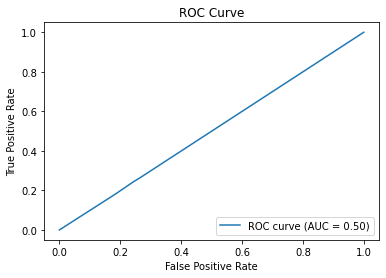


Random Forest:
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Cross-Validation Results (Train Set):


,param_max_depth,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
0,50,0.797615,0.004788,0.167284,0.002429
1,20,0.799545,0.000000,0.000000,0.000000
2,50,0.790922,0.028926,0.210150,0.015539
3,None,0.799557,0.000000,0.000000,0.000000
4,40,0.798559,0.003713,0.213193,0.001873
5,10,0.799545,0.000000,0.000000,0.000000
6,50,0.799516,0.000059,0.066667,0.000029
7,40,0.799527,0.000000,0.000000,0.000000
8,50,0.799545,0.000000,0.000000,0.000000
9,40,0.791198,0.026418,0.201967,0.014134



Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     58412
           1       0.22      0.02      0.03     14654

    accuracy                           0.79     73066
   macro avg       0.51      0.50      0.46     73066
weighted avg       0.68      0.79      0.71     73066


Accuracy: 0.7904
Precision: 0.2243
Recall: 0.0183
F1 Score: 0.0338
AUC: 0.0338


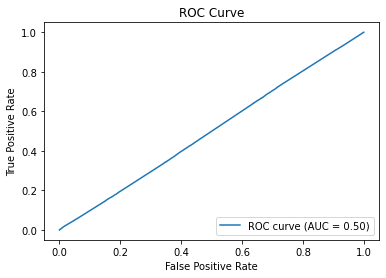


Gradient Boosting:
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Cross-Validation Results (Train Set):


,param_max_depth,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
0,9,0.799557,0.000000,0.000000,0.000000
1,9,0.799216,0.000584,0.127644,0.000293
2,7,0.799557,0.000000,0.000000,0.000000
3,9,0.797509,0.006218,0.192728,0.003160
4,5,0.799469,0.000234,0.132576,0.000117
5,7,0.709468,0.171871,0.200571,0.150470
6,5,0.799557,0.000000,0.000000,0.000000
7,5,0.799557,0.000000,0.000000,0.000000
8,5,0.799557,0.000000,0.000000,0.000000
9,3,0.799557,0.000000,0.000000,0.000000



Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     58412
           1       0.20      0.13      0.16     14654

    accuracy                           0.72     73066
   macro avg       0.50      0.50      0.50     73066
weighted avg       0.68      0.72      0.70     73066


Accuracy: 0.7190
Precision: 0.1987
Recall: 0.1323
F1 Score: 0.1588
AUC: 0.1588


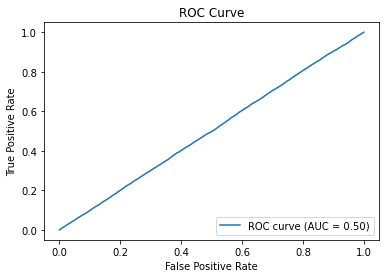

In [83]:
# Training the Models
print("Decision Tree:")
best_dt = train_and_evaluate(DecisionTreeClassifier(random_state=42), params_dt)

print("\nRandom Forest:")
best_rf = train_and_evaluate(RandomForestClassifier(random_state=42), params_rf)

print("\nGradient Boosting:")
best_gb = train_and_evaluate(GradientBoostingClassifier(random_state=42), params_gb)

# Function to Plot Feature Importances


In [84]:
def plot_importances(model, feature_names, title):
    importances = model.feature_importances_
    sorted_idx = importances.argsort()[-10:][::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(10), importances[sorted_idx])
    plt.yticks(range(10), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Importance")
    plt.show()


In [85]:
# Plot Feature Importances for Each Model

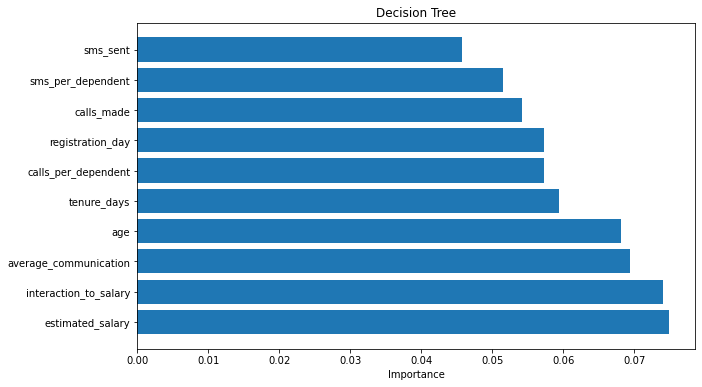

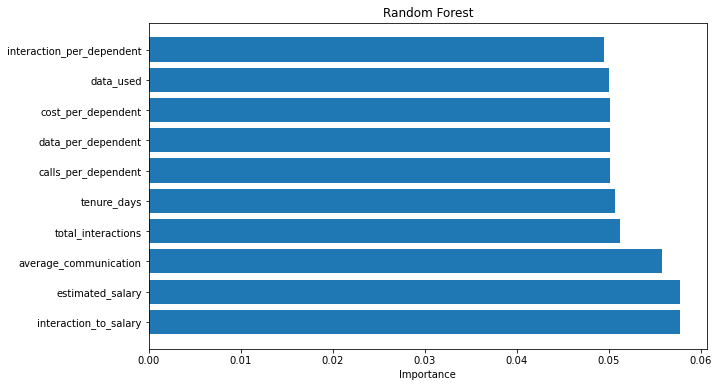

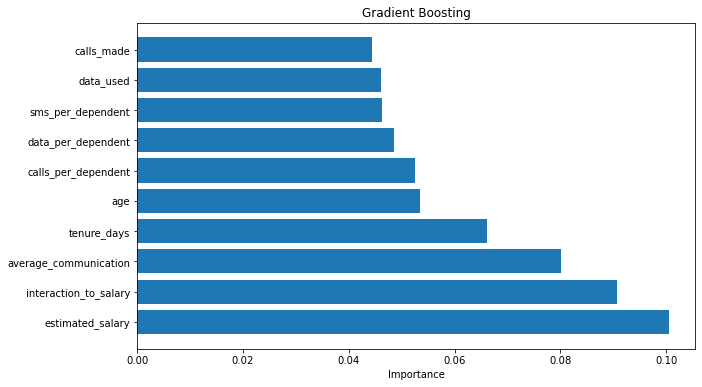

In [86]:
plot_importances(best_dt, X_train_df.columns, "Decision Tree")
plot_importances(best_rf, X_train_df.columns, "Random Forest")
plot_importances(best_gb, X_train_df.columns, "Gradient Boosting")

 # Feature Selection using Feature importances

In [87]:
#Based on the importance rankings, I am selecting the top 8 features for each model.

# Top features based on importance
selected_features = ['estimated_salary', 'interaction_to_salary', 'average_communication', 
    'tenure_days', 'age', 'calls_per_dependent', 'data_per_dependent', 'sms_per_dependent']

# Updated dataframe for modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


# Data Resampling with SMOTE


In [88]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)


In [89]:


# Define the train_and_evaluate function:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    
    # Train model
    model.fit(X_train, y_train)
    
    # Cross-validation for multiple metrics
    metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
    cv_scores = {}
    
    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train, cv=3, scoring=metric)
        cv_scores[f"CV {metric}"] = scores.mean()
    
    # Training set evaluation
    y_train_pred = model.predict(X_train)
    train_scores = {
        "Training accuracy": accuracy_score(y_train, y_train_pred),
        "Training precision": precision_score(y_train, y_train_pred),
        "Training recall": recall_score(y_train, y_train_pred),
        "Training f1": f1_score(y_train, y_train_pred)
    }
    
    # Test set evaluation
    y_test_pred = model.predict(X_test)
    test_scores = {
        "Test accuracy": accuracy_score(y_test, y_test_pred),
        "Test precision": precision_score(y_test, y_test_pred),
        "Test recall": recall_score(y_test, y_test_pred),
        "Test f1": f1_score(y_test, y_test_pred),
        "Test roc_auc": roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
    }
    
    # Combine all the results into one dictionary
    all_scores = {**train_scores, **cv_scores, **test_scores}
    
    return all_scores


# Application of the train_and_evaluate Function


In [90]:
# Using best hyperparameters
dt_best_params = {"max_depth": 20}
rf_best_params = {"max_depth": 50, "n_estimators": 100}
gb_best_params = {"max_depth": 7, "n_estimators": 100}

# Initializing models with the best parameters:
dt_model = DecisionTreeClassifier(**dt_best_params)
rf_model = RandomForestClassifier(**rf_best_params)
gb_model = GradientBoostingClassifier(**gb_best_params)

# Training and evaluating for each model
dt_results = train_and_evaluate(dt_model, X_train_selected, y_train, X_test_selected, y_test)
rf_results = train_and_evaluate(rf_model, X_train_selected, y_train, X_test_selected, y_test)
gb_results = train_and_evaluate(gb_model, X_train_selected, y_train, X_test_selected, y_test)

# Print the results for each model
print("Decision Tree Results:", dt_results)
print("\nRandom Forest Results:", rf_results)
print("\nGradient Boosting Results:", gb_results)


Decision Tree Results: {'Training accuracy': 0.8274003296439024, 'Training precision': 0.9306840863727092, 'Training recall': 0.1500892517484564, 'Training f1': 0.2584920874911803, 'CV accuracy': 0.777290937138902, 'CV f1': 0.05927315289126286, 'CV recall': 0.035642173645860774, 'CV precision': 0.19286477817994685, 'CV roc_auc': 0.4979822901929654, 'Test accuracy': 0.7790353926586921, 'Test precision': 0.20451843043995244, 'Test recall': 0.03521222874300532, 'Test f1': 0.060080339989520865, 'Test roc_auc': 0.5043165197176523}

Random Forest Results: {'Training accuracy': 0.9997067225067013, 'Training precision': 1.0, 'Training recall': 0.9985368565826822, 'Training f1': 0.9992678927023545, 'CV accuracy': 0.7992750180365658, 'CV f1': 0.0010507626236609686, 'CV recall': 0.00035115442015626374, 'CV precision': 0.2647058823529412, 'CV roc_auc': 0.49813752965158126, 'Test accuracy': 0.7992226206443489, 'Test precision': 0.16666666666666666, 'Test recall': 0.0002729630135116692, 'Test f1': 0

# Updated Train_and_Evaluate Function

Decision Tree on Selected Features:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     58412
           1       0.21      0.24      0.22     14654

    accuracy                           0.66     73066
   macro avg       0.50      0.50      0.50     73066
weighted avg       0.68      0.66      0.67     73066


Accuracy: 0.6639
Precision: 0.2062
Recall: 0.2372
F1 Score: 0.2206
AUC: 0.5041


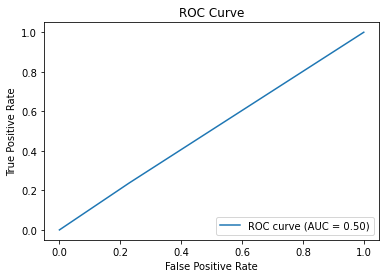


Random Forest on Selected Features:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     58412
           1       0.20      0.09      0.12     14654

    accuracy                           0.74     73066
   macro avg       0.50      0.50      0.49     73066
weighted avg       0.68      0.74      0.70     73066


Accuracy: 0.7426
Precision: 0.1962
Recall: 0.0915
F1 Score: 0.1248
AUC: 0.5011


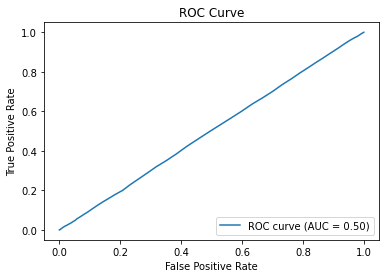


Gradient Boosting on Selected Features:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.47      0.59     58412
           1       0.20      0.53      0.29     14654

    accuracy                           0.48     73066
   macro avg       0.50      0.50      0.44     73066
weighted avg       0.68      0.48      0.53     73066


Accuracy: 0.4829
Precision: 0.1998
Recall: 0.5250
F1 Score: 0.2894
AUC: 0.4996


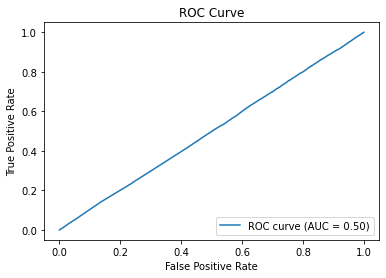

In [91]:

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions & Probabilities on Test set
    y_pred = model.predict(X_test)
    y_probas = model.predict_proba(X_test)[:, 1]
    
    # Display results on Test set
    print("\nClassification Report (Test Set):\n")
    print(classification_report(y_test, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_probas)
    
    # Display metrics
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {AUC:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {AUC:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return model

# Training the models on resampled data:
print("Decision Tree on Selected Features:")
best_dt_selected = train_and_evaluate(DecisionTreeClassifier(random_state=42), X_train_resampled, y_train_resampled, X_test_selected, y_test)

print("\nRandom Forest on Selected Features:")
best_rf_selected = train_and_evaluate(RandomForestClassifier(random_state=42), X_train_resampled, y_train_resampled, X_test_selected, y_test)

print("\nGradient Boosting on Selected Features:")
best_gb_selected = train_and_evaluate(GradientBoostingClassifier(random_state=42), X_train_resampled, y_train_resampled, X_test_selected, y_test)


# Model Tweaks and refinements

Decision Tree on Selected Features:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.05      0.10     58412
           1       0.20      0.95      0.33     14654

    accuracy                           0.23     73066
   macro avg       0.50      0.50      0.21     73066
weighted avg       0.68      0.23      0.14     73066


Accuracy: 0.2315
Precision: 0.2005
Recall: 0.9479
F1 Score: 0.3310
AUC: 0.4999


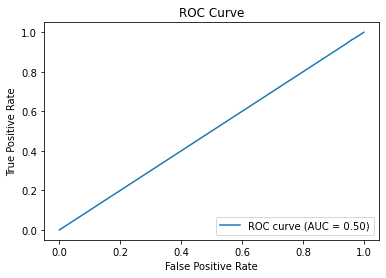


Random Forest on Selected Features:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.23      0.36     58412
           1       0.20      0.77      0.32     14654

    accuracy                           0.34     73066
   macro avg       0.50      0.50      0.34     73066
weighted avg       0.68      0.34      0.35     73066


Accuracy: 0.3411
Precision: 0.2015
Recall: 0.7712
F1 Score: 0.3195
AUC: 0.5025


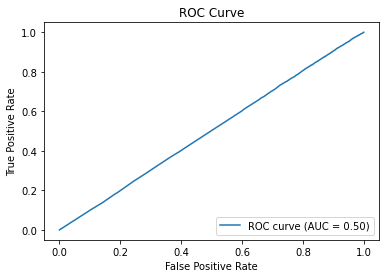


Gradient Boosting on Selected Features:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.80      0.30      0.43     58412
           1       0.20      0.70      0.31     14654

    accuracy                           0.38     73066
   macro avg       0.50      0.50      0.37     73066
weighted avg       0.68      0.38      0.41     73066


Accuracy: 0.3786
Precision: 0.2004
Recall: 0.7017
F1 Score: 0.3117
AUC: 0.4987


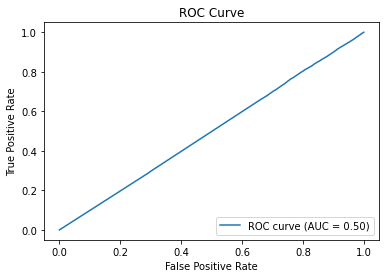

In [92]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions & Probabilities on Test set
    y_pred = model.predict(X_test)
    y_probas = model.predict_proba(X_test)[:, 1]
    
    # Display results on Test set
    print("\nClassification Report (Test Set):\n")
    print(classification_report(y_test, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_probas)
    
    # Display metrics
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {AUC:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {AUC:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return model

# Hyperparameter Recommendations
dt_params = {
    "max_depth": 5,
    "min_samples_split": 20,
    "min_samples_leaf": 10
}

rf_params = {
    "n_estimators": 100,
    "max_depth": 8,
    "min_samples_split": 20,
    "min_samples_leaf": 10,
    "class_weight": 'balanced'
}

gb_params = {
    "n_estimators": 80,
    "learning_rate": 0.05,
    "subsample": 0.9
}

# Training the models on resampled data:
print("Decision Tree on Selected Features:")
best_dt_selected = train_and_evaluate(DecisionTreeClassifier(random_state=42, **dt_params), X_train_resampled, y_train_resampled, X_test_selected, y_test)

print("\nRandom Forest on Selected Features:")
best_rf_selected = train_and_evaluate(RandomForestClassifier(random_state=42, **rf_params), X_train_resampled, y_train_resampled, X_test_selected, y_test)

print("\nGradient Boosting on Selected Features:")
best_gb_selected = train_and_evaluate(GradientBoostingClassifier(random_state=42, **gb_params), X_train_resampled, y_train_resampled, X_test_selected, y_test)


# optimizing the F1 score

Decision Tree with Tuned Parameters:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.79      0.01      0.01     58412
           1       0.20      0.99      0.33     14654

    accuracy                           0.20     73066
   macro avg       0.50      0.50      0.17     73066
weighted avg       0.67      0.20      0.08     73066


Accuracy: 0.2041
Precision: 0.2005
Recall: 0.9938
F1 Score: 0.3337
AUC: 0.4994


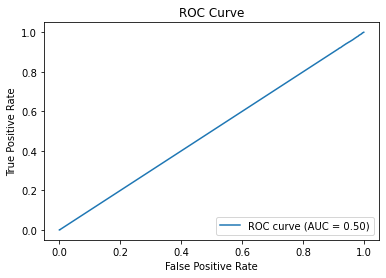


Random Forest with Tuned Parameters:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.85      0.00      0.00     58412
           1       0.20      1.00      0.33     14654

    accuracy                           0.20     73066
   macro avg       0.52      0.50      0.17     73066
weighted avg       0.72      0.20      0.07     73066


Accuracy: 0.2017
Precision: 0.2006
Recall: 0.9988
F1 Score: 0.3341
AUC: 0.5029


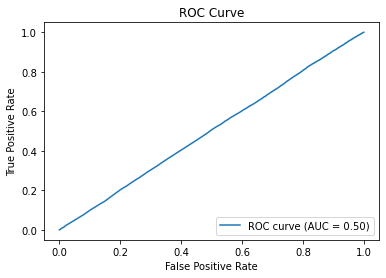


Gradient Boosting with Tuned Parameters:

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     58412
           1       0.20      1.00      0.33     14654

    accuracy                           0.20     73066
   macro avg       0.60      0.50      0.17     73066
weighted avg       0.84      0.20      0.07     73066


Accuracy: 0.2006
Precision: 0.2006
Recall: 1.0000
F1 Score: 0.3341
AUC: 0.4998


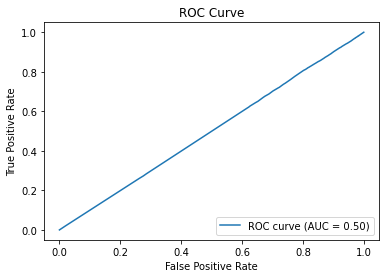

In [93]:

# Adjust the thresholds based on F1 score
def get_optimal_threshold(y_true, y_probas):
    thresholds = np.linspace(0.1, 0.9, 100)
    f1_scores = [f1_score(y_true, [1 if p > t else 0 for p in y_probas]) for t in thresholds]
    return thresholds[np.argmax(f1_scores)]

# Training and evaluating function with threshold adjustment
def train_and_evaluate_with_threshold(model, X_train, y_train, X_test, y_test):
    # Train model
    model.fit(X_train, y_train)
    y_probas = model.predict_proba(X_test)[:, 1]
    
    # Adjust threshold based on F1 score
    threshold = get_optimal_threshold(y_test, y_probas)
    y_pred = [1 if p > threshold else 0 for p in y_probas]
    
    # Display results on Test set
    print("\nClassification Report (Test Set):\n")
    print(classification_report(y_test, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_probas)
    
    # Display metrics
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {AUC:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {AUC:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return model

# Model Parameters
dt_params = {
    'max_depth': 10,
    'min_samples_split': 20,
    'min_samples_leaf': 10,
    'random_state': 42
}

rf_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'class_weight': 'balanced',
    'random_state': 42
}

gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'random_state': 42
}

# Train and Evaluate
print("Decision Tree with Tuned Parameters:")
_ = train_and_evaluate_with_threshold(DecisionTreeClassifier(**dt_params), X_train_resampled, y_train_resampled, X_test_selected, y_test)

print("\nRandom Forest with Tuned Parameters:")
_ = train_and_evaluate_with_threshold(RandomForestClassifier(**rf_params), X_train_resampled, y_train_resampled, X_test_selected, y_test)

print("\nGradient Boosting with Tuned Parameters:")
_ = train_and_evaluate_with_threshold(GradientBoostingClassifier(**gb_params), X_train_resampled, y_train_resampled, X_test_selected, y_test)
